#  Computer  vision libraries & Dataset
* `torchvision` -> Base domain library for PyTorch computer vision.
* `torchvision.datasets` -> get datasets and data loading functions.
* `torchvision.models` -> get pretrained models.
* `torchvision.transforms` ->  It's a common image transformations.
* `torch.utils.Dataset` -> Base dataset class to create custom dataset.
* `torch.utils.DataLoader` -> Creates a Python iterable over a dataset.


In [1]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

In [2]:
train_dataset = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)
test_dataset = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

In [3]:
len(train_dataset), len(test_dataset)

(60000, 10000)

In [4]:
image, label = train_dataset[0]
image, label


(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
class_names = train_dataset.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
class_to_idx = train_dataset.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
train_dataset.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [8]:
image.shape

torch.Size([1, 28, 28])

# Some Visualization

Image Shape: torch.Size([1, 28, 28])


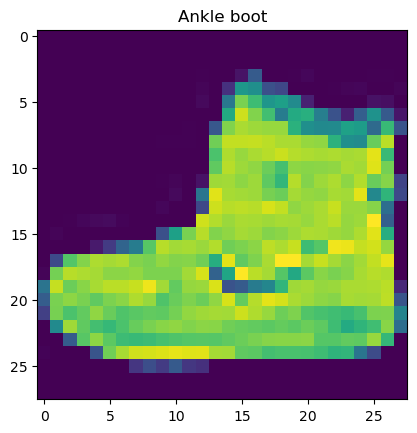

In [9]:
image, label = train_dataset[0]
print(f"Image Shape: {image.shape}")

plt.imshow(image.squeeze())
plt.title(class_names[label])
plt.show()

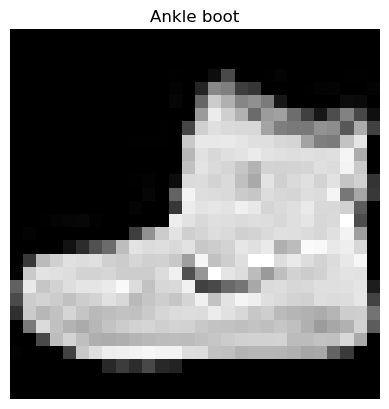

In [10]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis("off")
plt.show()

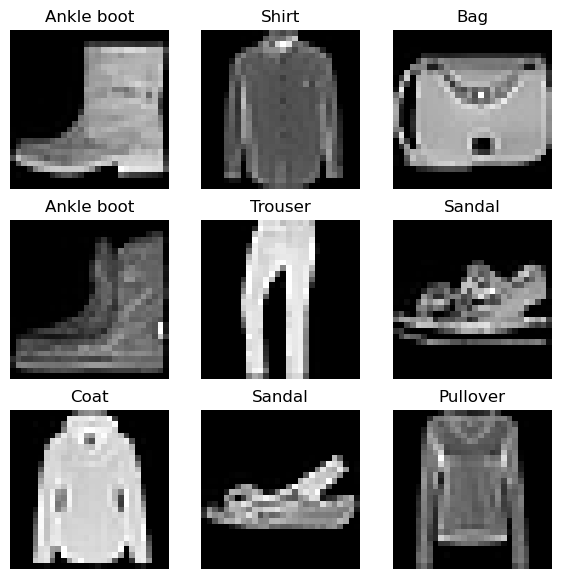

In [11]:
# plot more images.
torch.manual_seed(42)

fig = plt.figure(figsize=(7, 7))
rows, cols = 3, 3
for i in range(1, rows*cols + 1):
    random_idx = torch.randint(0, len(train_dataset), [1]).item()
    image, label = train_dataset[random_idx]
    plt.subplot(rows, cols, i)
    plt.imshow(image.squeeze(), cmap="gray")
    plt.axis("off")
    plt.title(class_names[label])

# Prepare DataLoader

In [12]:
from torch.utils.data import DataLoader
import multiprocess

batch_size = 32
num_workers = multiprocess.cpu_count()


train_loader = DataLoader(
    train_dataset,
    batch_size=batch_size,
    shuffle=True,
    num_workers=num_workers,
)

test_loader = DataLoader(
    test_dataset,
    batch_size=batch_size,
    shuffle=False,
    num_workers=num_workers,
)

In [13]:
print(f"Length of Train DataLoader: {len(train_loader)}")
print(f"Length of Test DataLoader: {len(test_loader)}")

Length of Train DataLoader: 1875
Length of Test DataLoader: 313


In [14]:
# Show a sample
train_feature_batch, label_featuer_batch = next(iter(train_loader))
train_feature_batch.shape, label_featuer_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

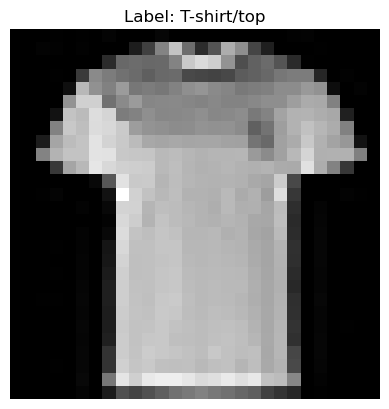

In [15]:
torch.manual_seed(43)
random_idx = torch.randint(1, len(train_feature_batch), size=[1]).item()
img, label = train_feature_batch[random_idx], label_featuer_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(f"Label: {class_names[label]}")
plt.axis("off")
plt.show()

# Model 0:

## Build a baseline model

In [16]:
# 1. Flatten Layer
flatten_layer = nn.Flatten()

x = train_feature_batch[0]

output = flatten_layer(x)

# print what happened?
print(f"Old shape: {x.shape}")
print(f"New shape: {output.shape}")

Old shape: torch.Size([1, 28, 28])
New shape: torch.Size([1, 784])


In [17]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
device

device(type='cpu')

In [18]:
class FashionMNISTModelV0(nn.Module):
    def __init__(self, input_shape, output_shape, hidden_units):
        super().__init__()
        
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
        )
    def forward(self, x):
        return  self.layer_stack(x)
    
model_0 = FashionMNISTModelV0(input_shape=28*28, hidden_units=10, output_shape=len(class_names)).to(device)
model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

## Set up optimize, loss, & evaluation metrics for Model_0
* **Loss Function**: We are working with multi-class data, our loss func will be `torch.nn.CrossEntropyLoss()`.
* **Optimizer**: `torch.optim.SGD()`.
* **Evaluation Metrics**: we will use the accuracy func as our evaluation metrics.

In [19]:
# accuracy func
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    accuracy = correct / len(y_true)
    return accuracy

# Optimizer
optimizer = torch.optim.SGD(model_0.parameters(), lr=0.1)

# loss func
loss_fun = nn.CrossEntropyLoss()

## Function to Time out our experiments.
* The main things you will often you want to track:
    * model's performance.
    * How fast it runs.
    

In [20]:
from timeit import default_timer as timer

def print_train_timer(start: float, end: float, device: torch.device=None):
    total_time = end - start
    print(f"Train time on :{device}, Total time: {total_time:.3f} seconds")
    return total_time

In [21]:
start_time = timer()
# Make Something...
end_time = timer()

print_train_timer(start_time, end_time, device)

Train time on :cpu, Total time: 0.000 seconds


3.220001235604286e-05

## Training loop.
1. Loop through epochs.
2. loop through training batches, perform training steps, and calculate the train loss per batch.
3. loop through testing batches, perform testing steps, and calculate the test loss per batch.
4. print out what's happening.
5. Time it all

In [22]:
from tqdm.auto import tqdm

torch.manual_seed(42)
epochs = 3

start_train_time = timer()

for epoch in tqdm(range(epochs)):
    
    print(f"Epoch: {epoch}\n------")
    
    ### Training
    train_loss = 0.0
    for batch, (X, y) in enumerate(train_loader):
        model_0.train()
        
        y_pred = model_0(X)
        
        loss = loss_fun(y_pred, y)
        train_loss += loss
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if batch % 300 ==0:
            print(f"Looked at : {batch * len(X)} / {len(train_loader.dataset)} samples.")
            
    train_loss /= len(train_loader)
    
    ### Testing
    model_0.eval()
    test_loss, test_acc = 0.0, 0.0
    
    with torch.inference_mode():
        for X_test, y_test in test_loader:
            test_pred = model_0(X_test)
            
            test_loss += loss_fun(test_pred, y_test)

            test_acc += accuracy_fn(y_test, test_pred.argmax(dim=1))
            
        test_loss /= len(test_loader)
        test_acc /= len(test_loader)
        
    print(f"Train Loss: {train_loss:.4f} | Test_loss: {test_loss:.4f} | Test Acc: {test_acc:.4f}")
    
end_train_time = timer()

total_train_time_model_0 = print_train_timer(start_train_time, end_train_time, device)
        

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Looked at : 0 / 60000 samples.
Looked at : 9600 / 60000 samples.
Looked at : 19200 / 60000 samples.
Looked at : 28800 / 60000 samples.
Looked at : 38400 / 60000 samples.
Looked at : 48000 / 60000 samples.
Looked at : 57600 / 60000 samples.
Train Loss: 0.5930 | Test_loss: 0.5090 | Test Acc: 0.8209
Epoch: 1
------
Looked at : 0 / 60000 samples.
Looked at : 9600 / 60000 samples.
Looked at : 19200 / 60000 samples.
Looked at : 28800 / 60000 samples.
Looked at : 38400 / 60000 samples.
Looked at : 48000 / 60000 samples.
Looked at : 57600 / 60000 samples.
Train Loss: 0.4767 | Test_loss: 0.4850 | Test Acc: 0.8292
Epoch: 2
------
Looked at : 0 / 60000 samples.
Looked at : 9600 / 60000 samples.
Looked at : 19200 / 60000 samples.
Looked at : 28800 / 60000 samples.
Looked at : 38400 / 60000 samples.
Looked at : 48000 / 60000 samples.
Looked at : 57600 / 60000 samples.
Train Loss: 0.4548 | Test_loss: 0.4771 | Test Acc: 0.8336
Train time on :cpu, Total time: 134.662 seconds


## Make predictions and get model 0 results.

In [23]:
torch.manual_seed(42)

def eval_model(
    model: torch.nn.Module,
    data_loader: torch.utils.data.DataLoader,
    loss_fn: torch.nn.Module,
    accuracy_fn
):
    loss, acc = 0, 0
    
    model.eval()
    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            
            y_preds = model(X)
            
            loss += loss_fn(y_preds, y)
            acc += accuracy_fn(y_true=y, y_pred=y_preds.argmax(dim=1))

        loss /= len(data_loader)
        acc /= len(data_loader)
    return {
        "model_name": model.__class__.__name__,
        "model_loss": loss.item(),
        "model_acc": acc
    }
    

In [24]:
model_0_results = eval_model(model_0, test_loader, loss_fun, accuracy_fn)

  0%|          | 0/313 [00:00<?, ?it/s]

In [25]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.4771345257759094,
 'model_acc': 0.8335662939297125}

____

# Model 1:
## Building a better model with non-linearity

In [26]:
# create the model
class FashionMNISTModelV1(nn.Module):
    def __init__(self, input_shape, output_shape, hidden_units):
        super().__init__()
        
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU()
        )
    def forward(self, x):
        return  self.layer_stack(x)

In [27]:
# create an instance
model_1 = FashionMNISTModelV1(
    input_shape=28*28,
    hidden_units=10,
    output_shape=len(class_names)
).to(device)

model_1

FashionMNISTModelV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

## Setup loss, potimizer, & evaluation metrics

In [28]:
optimizer = torch.optim.SGD(model_1.parameters(), lr=0.1)
loss_fn = torch.nn.CrossEntropyLoss()

In [29]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = correct / len(y_true)
    return acc

## Functionizing training and evaluation loops
Let's create a function for:
   * training loop: `train_step()`
   * testing loop: `test_step()`

In [30]:
def train_step(
    model: torch.nn.Module,
    data_loader: torch.utils.data.DataLoader,
    loss_fn: torch.nn.Module,
    optimizer: torch.optim.Optimizer,
    accuracy_fn,
    device: torch.device=device
):
    
    model.train()
    
    train_loss, train_acc = 0.0, 0.0
    for batch, (X, y) in enumerate(data_loader):
        
        X, y = X.to(device), y.to(device)
        y_pred = model(X)
        
        loss = loss_fn(y_pred, y)
        train_loss += loss
        
        train_acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

            
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    
    print(f"Train Loss: {train_loss:.5f} | Train Accuracy: {train_acc:.2f}%")

In [31]:
def test_step(
    model: torch.nn.Module,
    data_loder: torch.utils.data.DataLoader,
    loss_fn: torch.nn.Module,
    accuracy_fn,
    device: torch.device=device
):
    test_loss, test_acc = 0.0, 0.0
    model.eval()
    
    with torch.inference_mode():
        for X, y in data_loder:
            X, y = X.to(device), y.to(device)
            
            y_pred = model(X)
            
            test_loss += loss_fn(y_pred, y)

            test_acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
            
        test_loss /= len(data_loder)
        test_acc /= len(data_loder)
        
    print(f"Test_loss: {test_loss:.5f} | Test Accuracy: {test_acc:.2f}%\n")

## Training and Testing

In [32]:
torch.manual_seed(42)

from timeit import default_timer as timer

start = timer()
epochs = 3

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-----------")
    
    train_step(model_1, train_loader, loss_fn, optimizer, accuracy_fn)
    
    test_step(model_1, test_loader, loss_fn, accuracy_fn)
    
end = timer()


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----------
Train Loss: 1.11456 | Train Accuracy: 0.58%
Test_loss: 0.96320 | Test Accuracy: 0.63%

Epoch: 1
-----------
Train Loss: 0.90905 | Train Accuracy: 0.65%
Test_loss: 0.74544 | Test Accuracy: 0.73%

Epoch: 2
-----------
Train Loss: 0.59506 | Train Accuracy: 0.78%
Test_loss: 0.49534 | Test Accuracy: 0.83%



In [33]:
total_train_time_model_1 = print_train_timer(start=start, end=end)

Train time on :None, Total time: 193.644 seconds


In [34]:
# Get model_1 results
model_1_results = eval_model(model_1, test_loader, loss_fn, accuracy_fn)

  0%|          | 0/313 [00:00<?, ?it/s]

In [35]:
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.495336651802063,
 'model_acc': 0.8267771565495208}

In [36]:
import pandas as pd

pd.DataFrame([model_0_results, model_1_results])

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.477135,0.833566
1,FashionMNISTModelV1,0.495337,0.826777


____

# Model 2:

## Building a Convolutional Neural Network (CNN)
1. Stepping through `torch.nn.Conv2d`
2. Stepping through `torch.nn.MaxPool2d`

### `torch.nn.Conv2d`

In [37]:
torch.manual_seed(42)

# Create a batch of images.
images = torch.randn((32, 3, 64, 64))
test_image = images[0]

print(f"Image batch shape: {images.shape}")
print(f"Single inage batch shape: {image.shape}")
print(f"Test Image:\n {test_image}")

Image batch shape: torch.Size([32, 3, 64, 64])
Single inage batch shape: torch.Size([1, 28, 28])
Test Image:
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

      

In [38]:
torch.manual_seed(42)

# Create a single conv2d layer.
color_shannels = test_image.shape[0]
hidden_units = 32

conv_layer = nn.Conv2d(
    in_channels=color_shannels,
    out_channels=hidden_units,
    kernel_size=(3, 3), # one value for each dimension
    stride=1, # hop over one pixel at a time
    padding=1
)

In [39]:
test_image.unsqueeze(0).shape # unsqueeze the image to add one more dimension to the batch size.

torch.Size([1, 3, 64, 64])

In [40]:
# Pass the data through the Convolutional layer.
conv_out = conv_layer(test_image.unsqueeze(0))
conv_out.shape

torch.Size([1, 32, 64, 64])

### `torch.nn.MaxPool2d`

In [41]:
max_pool_layer = nn.MaxPool2d(kernel_size=2)

In [42]:
# print out original image shape
print(f"Test image original shape: {test_image.shape}")

# pass data through conv2d layer
output_conv = conv_layer(test_image)
print(f"Shape after going through conv2d layer: {output_conv.shape}")

# pass data through maxpooling layer
output_maxpooling = max_pool_layer(output_conv)
print(f"Shape after going through maxpooling layer: {output_maxpooling.shape}")


Test image original shape: torch.Size([3, 64, 64])
Shape after going through conv2d layer: torch.Size([32, 64, 64])
Shape after going through maxpooling layer: torch.Size([32, 32, 32])


In [43]:
torch.manual_seed(42)
# Create a random tensor
random_tensor = torch.randn((1, 1, 2, 2))
print(f"Random Tensor:\n {random_tensor}")
print(f"Random Tensor shape: {random_tensor.shape}")

# Pass the random tensor through the max pool layer
output_maxpooling = max_pool_layer(random_tensor)
print(f"Maxpool Tensor:\n {output_maxpooling}")
print(f"Maxpool Tensor shape: {output_maxpooling.shape}")

Random Tensor:
 tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Random Tensor shape: torch.Size([1, 1, 2, 2])
Maxpool Tensor:
 tensor([[[[0.3367]]]])
Maxpool Tensor shape: torch.Size([1, 1, 1, 1])


___

In [44]:
class FashionMNISTModelV2(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7, out_features=output_shape)
        )
        
    def forward(self, x):
        x = self.conv_block_1(x)
        x = self.conv_block_2(x)
        return self.classifier(x)

In [45]:
model_2 = FashionMNISTModelV2(
    input_shape=1,
    hidden_units=10,
    output_shape=len(class_names)
).to(device)

In [46]:
model_2(img.unsqueeze(0))

tensor([[ 0.0487, -0.0201,  0.0009,  0.0005,  0.0417,  0.0128, -0.0204,  0.0354,
          0.0125,  0.0008]], grad_fn=<AddmmBackward0>)

### Setup loss function and optimizer to `model_2`

In [47]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = correct / len(y_true)
    return acc

optimizer = torch.optim.SGD(model_2.parameters(), lr=0.1)
loss_fn = torch.nn.CrossEntropyLoss()

### Training an Testing the `model_2`

In [48]:
torch.manual_seed(42)

from timeit import default_timer as timer

start = timer()

epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    
    train_step(model_2, train_loader, loss_fn, optimizer, accuracy_fn)
    
    test_step(model_2, test_loader, loss_fn, accuracy_fn)

end = timer()
total_train_time_model_2 = print_train_timer(start=start, end=end)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train Loss: 0.76852 | Train Accuracy: 0.72%
Test_loss: 0.41385 | Test Accuracy: 0.85%

Epoch: 1
---------
Train Loss: 0.37637 | Train Accuracy: 0.86%
Test_loss: 0.38046 | Test Accuracy: 0.86%

Epoch: 2
---------
Train Loss: 0.33948 | Train Accuracy: 0.88%
Test_loss: 0.35144 | Test Accuracy: 0.87%

Train time on :None, Total time: 233.855 seconds


In [49]:
# Get model_2 results
model_2_results = eval_model(model_2, test_loader, loss_fn, accuracy_fn)

  0%|          | 0/313 [00:00<?, ?it/s]

In [50]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3514391779899597,
 'model_acc': 0.8702076677316294}

____

# Compare model results and training time

In [51]:
import pandas as pd

compare_results = pd.DataFrame([model_0_results, model_1_results, model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.477135,0.833566
1,FashionMNISTModelV1,0.495337,0.826777
2,FashionMNISTModelV2,0.351439,0.870208


In [52]:
compare_results["training_time"] = [total_train_time_model_0, total_train_time_model_1, total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.477135,0.833566,134.662405
1,FashionMNISTModelV1,0.495337,0.826777,193.644384
2,FashionMNISTModelV2,0.351439,0.870208,233.855107


Text(0, 0.5, 'Model')

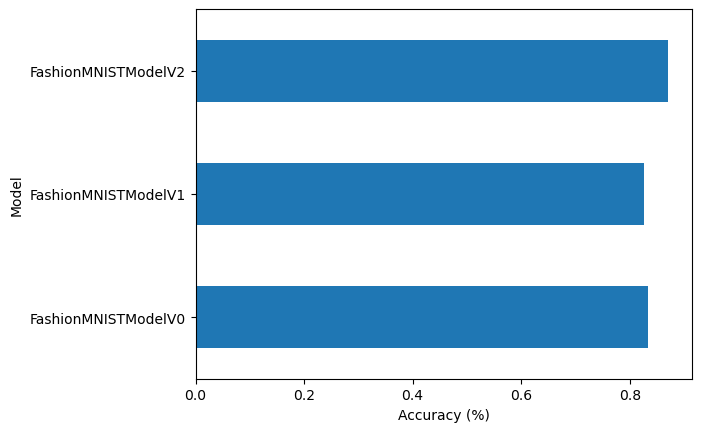

In [53]:
# Visualize model results

compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("Accuracy (%)")
plt.ylabel("Model")

# Make predictions and evaluate them with best moel

In [54]:
def make_prediction(
    model: torch.nn.Module,
    data: list,
    device: torch.device=device
):
    pred_probs = []
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for sample in data:
            sample = torch.unsqueeze(sample, dim=0).to(device)
            
            pred_logit = model(sample)
            
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)
            
            pred_probs.append(pred_prob.cpu())
            
    return torch.stack(pred_probs)            

In [55]:
import random

random.seed(34)
test_samples = []
test_labels = []

for sample, label in random.sample(list(test_dataset), k=9):
    test_samples.append(sample)
    test_labels.append(label)

In [56]:
pred_probs = make_prediction(model_2, test_samples)

In [57]:
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([8, 9, 8, 1, 8, 6, 1, 9, 3])

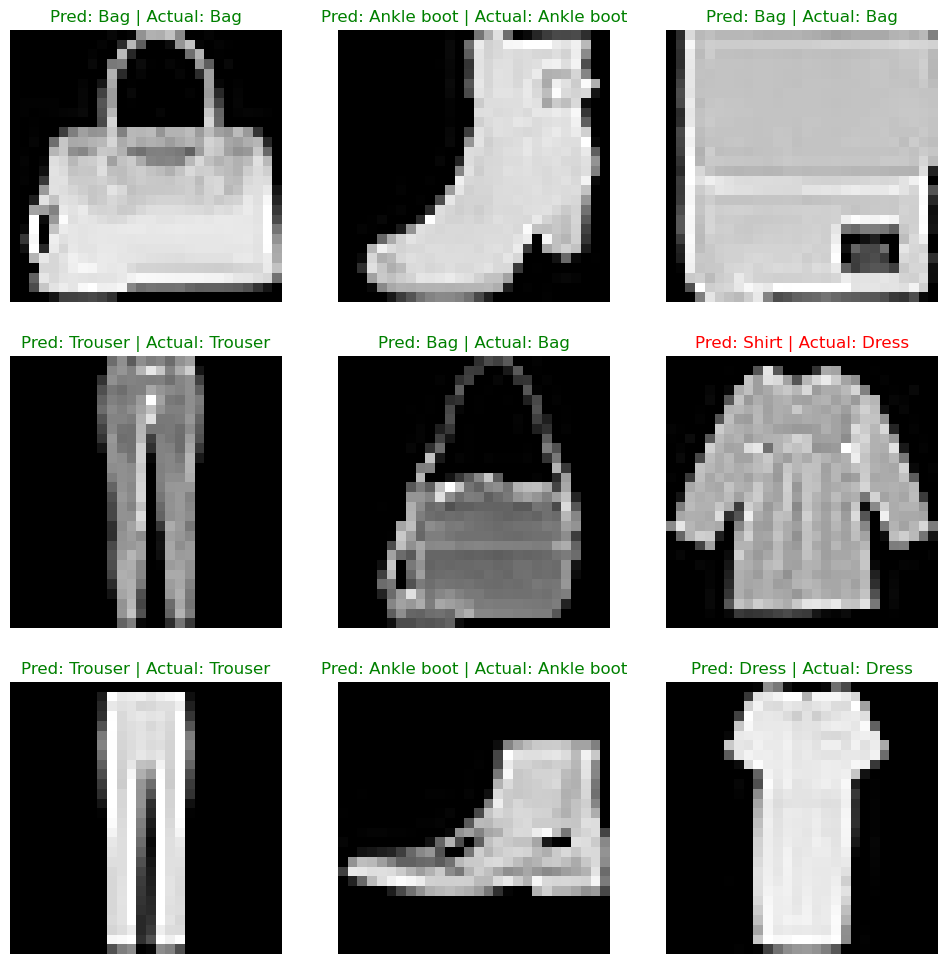

In [58]:
# Plot predictions

plt.figure(figsize=(12, 12))
nrows, ncols = (3, 3)

for i, sample in enumerate(test_samples):
    
    plt.subplot(nrows, ncols, i+1)
    
    plt.imshow(sample.squeeze(0), cmap="gray")
    
    pred_label = class_names[pred_classes[i]]
    actual_label = class_names[test_labels[i]]
    title_text = f"Pred: {pred_label} | Actual: {actual_label}"
    
    if pred_label == actual_label:
        plt.title(title_text, c="g")
    else:
        plt.title(title_text, c="r")
    
    plt.axis("off")

# Making a confusion matrix

In [59]:
from tqdm.auto import tqdm

y_preds = []
model_2.eval()

with torch.inference_mode():
    for X, y in tqdm(test_loader, desc="Making predictions..."):
        X, y = X.to(device), y.to(device)
        
        y_logits = model_2(X)
        y_pred = torch.softmax(y_logits.squeeze(), dim=0).argmax(dim=1)
        
        y_preds.append(y_pred.cpu())

Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

In [60]:
y_preds_tensor = torch.cat(y_preds)
y_preds_tensor

tensor([9, 2, 1,  ..., 0, 1, 8])

In [61]:
len(y_preds_tensor)

10000

___

In [62]:
!pip install mlxtend -U

In [63]:
import mlxtend

print(mlxtend.__version__)

0.23.1


In [64]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

In [65]:
confmat = ConfusionMatrix(task="multiclass", num_classes=len(class_names))
confmat_tensor = confmat(preds=y_preds_tensor, target=test_dataset.targets)

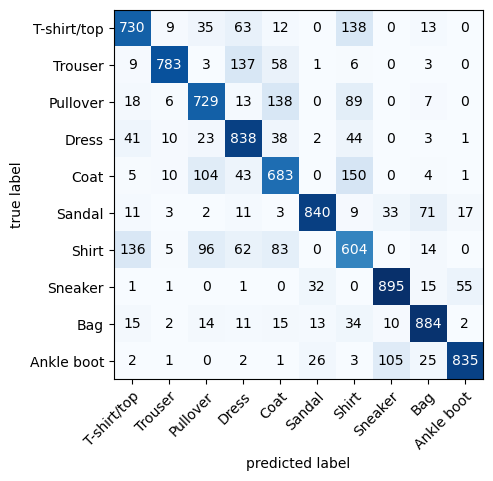

In [66]:
fig, ax = plot_confusion_matrix(
    confmat_tensor.numpy(),
    class_names=class_names,
)

# Save & Load best performing model

### Save model

In [67]:
from pathlib import Path
# Create model dictionary path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# Create model save
MODEL_NAME = f"pytorh_computer_vision_{model_2.__class__.__name__}.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(), f=MODEL_SAVE_PATH)

Saving model to: models\pytorh_computer_vision_FashionMNISTModelV2.pth


### Load Model

In [68]:
# Create Instance
loaded_model_2 = FashionMNISTModelV2(input_shape=1, hidden_units=10, output_shape=len(class_names))

# Load in the save state dict
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Send the model to the target device
loaded_model_2.to(device)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

### Evaluate the loaded model

In [69]:
torch.manual_seed(42)

loaded_model_2_results = eval_model(loaded_model_2, test_loader, loss_fn, accuracy_fn)

  0%|          | 0/313 [00:00<?, ?it/s]

In [70]:
loaded_model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3514391779899597,
 'model_acc': 0.8702076677316294}